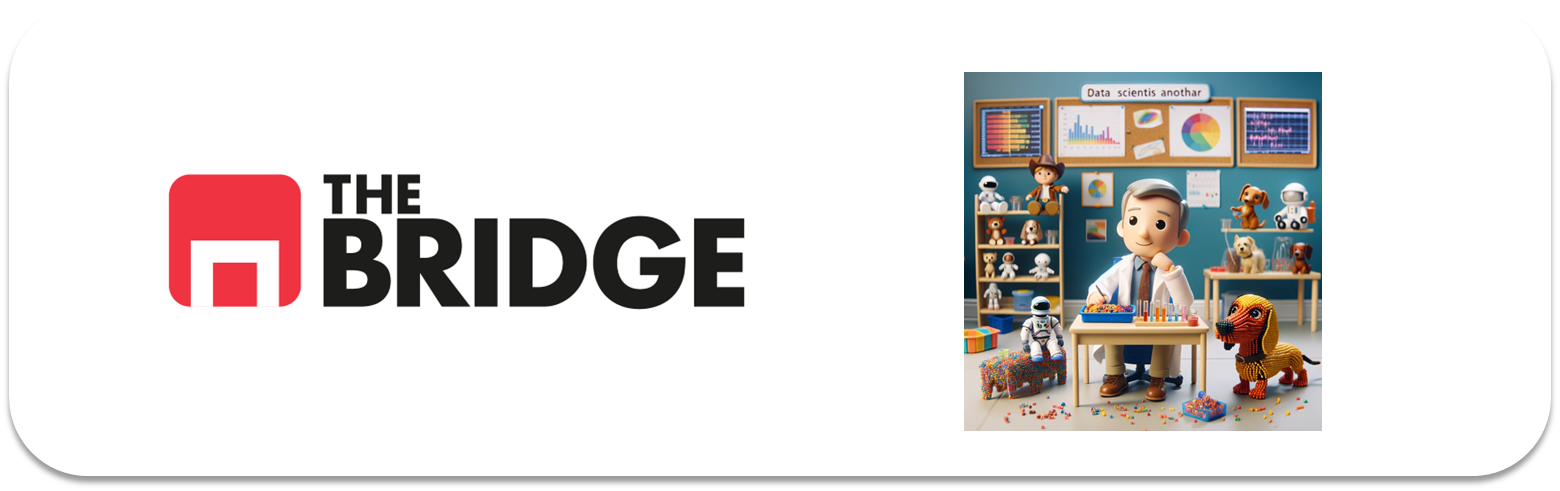

## PRACTICA OBLIGATORIA: **Análisis Univariante**

* La práctica obligatoria de esta unidad consiste en hacer el análisis univariante completo de un dataset con el que acabarás muy familiarizado, el manifiesto de pasajeros del Titanic. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook. Te dejo una que vas a necesitar sí o sí

In [1]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns




### #1 Preparación


### #1.1


Carga en un dataframe los datos del titanic a partir de un dataset de seaborn. Para ello:

* ejecuta ```python sns.get_dataset_names()```
* localiza el nombre que puede ser el adecuado para el ejercicio
* Asigna la salida de ```sns.load_dataset(<nombre_del_dataset>)``` a una variable "df_titanic"

In [20]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [5]:
df= sns.load_dataset("titanic")

### #1.2

Muestra una porción del dataset ("df_titanic") y su info general. ¿Hay nulos?

In [22]:
df.sample(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
417,1,2,female,18.0,0,2,13.0000,S,Second,woman,False,NaN,Southampton,yes,False
216,1,3,female,27.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
656,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
252,0,1,male,62.0,0,0,26.5500,S,First,man,True,C,Southampton,no,True
798,0,3,male,30.0,0,0,7.2292,C,Third,man,True,NaN,Cherbourg,no,True
315,1,3,female,26.0,0,0,7.8542,S,Third,woman,False,NaN,Southampton,yes,True
866,1,2,female,27.0,1,0,13.8583,C,Second,woman,False,NaN,Cherbourg,yes,False
244,0,3,male,30.0,0,0,7.2250,C,Third,man,True,NaN,Cherbourg,no,True
98,1,2,female,34.0,0,1,23.0000,S,Second,woman,False,NaN,Southampton,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


### #1.3

Obtén el porcentaje de nulos y decide que hacer con las columnas con nulos y ejecútalo. Además deshazte de la columna "parch" que no la emplearemos.

In [10]:
(df.isna().sum() / len(df) * 100).round(2).sort_values(ascending=False)[:4]

deck           77.22
age            19.87
embarked        0.22
embark_town     0.22
dtype: float64

In [ ]:
df = df.drop(["deck","parch"],axis=1) #Alternativa: rellenar nulos con UNK y los otros con K
df

,survived,pclass,sex,age,sibsp,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,NaN,1,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [ ]:
most_frequent = df.embarked.mode()[0]
df.embarked = df.embarked.fillna(most_frequent)
#df.loc[df["embark_town"].isna(), "embark_town"] = embark_town_mode

In [28]:
most_frequent = df.embark_town.mode()[0]
df.embark_town = df.embark_town.fillna(most_frequent)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   fare         891 non-null    float64 
 6   embarked     891 non-null    object  
 7   class        891 non-null    category
 8   who          891 non-null    object  
 9   adult_male   891 non-null    bool    
 10  embark_town  891 non-null    object  
 11  alive        891 non-null    object  
 12  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(3), object(5)
memory usage: 72.5+ KB


In [21]:
df["embarked"].value_counts(dropna=False)

embarked
S      644
C      168
Q       77
NaN      2
Name: count, dtype: int64

In [22]:
df["embark_town"].value_counts(dropna=False)

embark_town
Southampton    644
Cherbourg      168
Queenstown      77
NaN              2
Name: count, dtype: int64

In [23]:
df.loc[df["embarked"].isna()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True


In [19]:
df.groupby(['embark_town'], observed=False)['pclass'].value_counts()

embark_town  pclass
Cherbourg    1          85
             3          66
             2          17
Queenstown   3          72
             2           3
             1           2
Southampton  3         353
             2         164
             1         127
Name: count, dtype: int64

<Axes: >

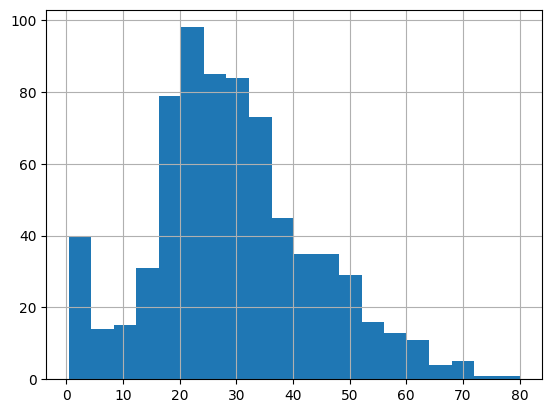

In [24]:
df["age"].hist(bins=20)

In [25]:
df['age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64

In [29]:
df.groupby(['sex', 'pclass'], observed=False)['age'].mean()

sex     pclass
female  1         34.611765
        2         28.722973
        3         21.750000
male    1         41.281386
        2         30.740707
        3         26.507589
Name: age, dtype: float64

In [31]:
df['age'] = df.groupby(['sex', 'pclass'])['age'].transform(lambda x: x.fillna(x.mean()))

In [28]:
df.groupby(['who'])['age'].median()

who
child     5.0
man      30.0
woman    30.0
Name: age, dtype: float64

In [ ]:
#Para no perder datos podemos marcar una columna con los nulos iniciales booleanos

In [35]:
#Alternativa: para simplificar, podemos utilizar la mediana (para media tenemos valores extremos importantes)

# Imputo el valor por who en age:
es_woman = df.who == "woman"
es_child = df.who == "child"
es_man = df.who == "man"
mediana_woman = df.loc[es_woman,"age"].median()
mediana_child = df.loc[es_child,"age"].median() # No hay chiquillos nulos, pero por si acaso...
mediana_man = df.loc[es_man,"age"].median()
es_age_nulo = df.age.isna()
df.loc[es_woman & es_age_nulo, "age"] = mediana_woman
df.loc[es_child & es_age_nulo, "age"] = mediana_child
df.loc[es_man & es_age_nulo, "age"] = mediana_man

<Axes: >

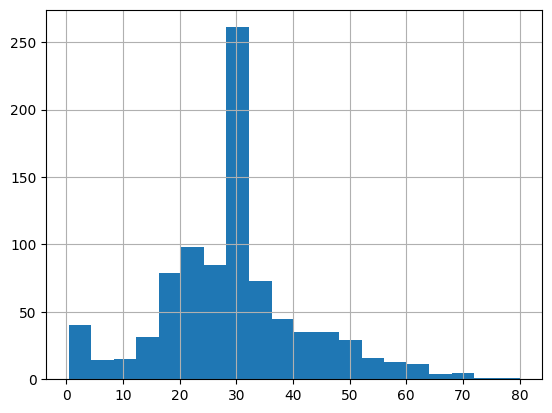

In [31]:
df["age"].hist(bins=20)

In [ ]:
df.loc[df['age_isna'],"age"].hist(bins=20)

KeyError: 'es_age_nulo'

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   fare         891 non-null    float64 
 6   embarked     891 non-null    object  
 7   class        891 non-null    category
 8   who          891 non-null    object  
 9   adult_male   891 non-null    bool    
 10  embark_town  891 non-null    object  
 11  alive        891 non-null    object  
 12  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(3), object(5)
memory usage: 72.5+ KB


### #1.4
Sobre el dataset "limpio". Rellena la tabla de descripción (muy breve) de lo que es cada columna en función de su nombre y los valores. Para ayudarte:
* Se trata del dataset que reune lo más parecido a un manifiesto de supervivientes y fallecidos en el viaje.
* sibsp: Es el numero de familiares que viajan con la persona indicada en el manifiesto (lista de pasajeros)
* embarked: Es la incial de la letra de la ciudad donde embarcó la persona.




| Columna/Variable | Descripción |
| ---------------- | ----------- |
| survived      |Superviviencia accidente|
|pclass|Nº clase embarco|
|sex|Sexo|
|age|Edad|
|sibsp|Nº familiares acompañantes|
|fare|Precio billete|
|embarked|Abrev. ciudad barco|
|class|Nombre clase embarco|
|who|Género|
|adult_male|True=hombre adulto|
|embarked_town|Ciudad embarco|
|alive|Superviviencia accidente|
|alone|True = 0 acompañantes|


| Columna/Variable | Descripción |
| ---------------- | ----------- |
| survived         | Indica si el pasajero sobrevivió (1) o no (0) |
| pclass           | Clase del pasaje (1ª, 2ª, 3ª) |
| sex              | Género del pasajero |
| age              | Edad del pasajero |
| sibsp            | Es el numero de familiares que viajan con la persona indicada en el manifiesto (lista de pasajeros) |
| parch            | Número de padres/hijos a bordo |
| fare             | Tarifa pagada por el pasajero |
| embarked         | Es la incial de la letra de la ciudad donde embarcó la persona.(C = Cherbourg; Q = Queenstown; S = Southampton) |
| class            | Clase del pasaje como categoría (Primera, Segunda, Tercera) |
| who              | Categoría del pasajero (hombre, mujer, niño) |
| adult_male       | Booleano que indica si el pasajero es un hombre adulto |
| deck             | Cubierta del barco donde se ubicaba el pasajero |
| embark_town      | Ciudad de embarque: Cherbourg; Queenstown; Southampton |
| alive            | Indica si el pasajero está vivo ('yes') o muerto ('no') |
| alone            | Booleano que indica si el pasajero viajaba solo |

### #1.5

Busca en internet las tres ciudades que visitó el Titanic antes de poner rumbo a su destino y llegar a alta mar. Cambia las iniciales por esos valores.

### #2 Análisis

Sabiendo que el objetivo de nuestro análisis es hacer un estudio de la superviviencia y mortalidad en el viaje... Haz un análisis univariante completo y ordenado de las siguientes variables:
["survived","who","age","fare","class","embarked","alone"]
Nota: Si quieres añadir más, perfecto.

Separa el análisis en categóricas (incluyendo binarias) y numéricas. Muestra valores, gráficas y conclusiones/observaciones (2 o 3 por variable)

In [38]:
# Primero dividir las variables por tipo, usando la función que programamos en los ejercicios
def card_tipo(df,umbral_categoria = 10, umbral_continua = 30):
    # Primera parte: Preparo el dataset con cardinalidades, % variación cardinalidad, y tipos
    df_temp = pd.DataFrame([df.nunique(), df.nunique()/len(df) * 100, df.dtypes]) # Cardinaliad y porcentaje de variación de cardinalidad
    df_temp = df_temp.T # Como nos da los valores de las columnas en columnas, y quiero que estas sean filas, la traspongo
    df_temp = df_temp.rename(columns = {0: "Card", 1: "%_Card", 2: "Tipo"}) # Cambio el nombre de la transposición anterior para que tengan más sentido, y uso asignación en vez de inplace = True (esto es arbitrario para el tamaño de este dataset)
    # Corrección para cuando solo tengo un valor
    df_temp.loc[df_temp.Card == 1, "%_Card"] = 0.00

     # Creo la columna de sugerenica de tipo de variable, empiezo considerando todas categóricas pero podría haber empezado por cualquiera, siempre que adapte los filtros siguientes de forma correspondiente
    df_temp["tipo_sugerido"] = "Categorica"
    df_temp.loc[df_temp["Card"] == 2, "tipo_sugerido"] = "Binaria"
    df_temp.loc[df_temp["Card"] >= umbral_categoria, "tipo_sugerido"] = "Numerica discreta"
    df_temp.loc[df_temp["%_Card"] >= umbral_continua, "tipo_sugerido"] = "Numerica continua"
    # Ojo los filtros aplicados cumplen con el enunciado pero no siguen su orden y planteamiento
    return df_temp



| Columna/Variable | Descripción |Tipo variable|
| ---------------- | ----------- |-----------|
| survived      |1=superviviente|Binaria|
|age|Edad|Num. Discreta|
|fare|Precio billete|Num. Continua|
|class|Nombre clase embarco|Categórica|
|who|Género adultos + niños|Binaria|
|embark_town|Ciudad embarco|Categórica|
|alone| True=0 acompañantes|Binaria|


In [39]:
card_tipo(df)

,Card,%_Card,Tipo,tipo_sugerido
survived,2,0.224467,int64,Binaria
pclass,3,0.3367,int64,Categorica
sex,2,0.224467,object,Binaria
age,88,9.876543,float64,Numerica discreta
sibsp,7,0.785634,int64,Categorica
parch,7,0.785634,int64,Categorica
fare,248,27.833895,float64,Numerica discreta
embarked,3,0.3367,object,Categorica
class,3,0.3367,category,Categorica
who,3,0.3367,object,Categorica


In [37]:
def variabilidad(df):
    df_var = df.describe().loc[["std","mean"]].T
    df_var["CV"] = df_var["std"]/df_var["mean"]
    return df_var

In [41]:

def pinta_distribucion_categoricas(df, columnas_categoricas, relativa=False, mostrar_valores=False):
    num_columnas = len(columnas_categoricas)
    num_filas = (num_columnas // 2) + (num_columnas % 2)

    fig, axes = plt.subplots(num_filas, 2, figsize=(15, 5 * num_filas))
    axes = axes.flatten() 

    for i, col in enumerate(columnas_categoricas):
        ax = axes[i]
        if relativa:
            total = df[col].value_counts().sum()
            serie = df[col].value_counts().apply(lambda x: x / total)
            sns.barplot(x=serie.index, y=serie, ax=ax, palette='viridis', hue = serie.index, legend = False)
            ax.set_ylabel('Frecuencia Relativa')
        else:
            serie = df[col].value_counts()
            sns.barplot(x=serie.index, y=serie, ax=ax, palette='viridis', hue = serie.index, legend = False)
            ax.set_ylabel('Frecuencia')

        ax.set_title(f'Distribución de {col}')
        ax.set_xlabel('')
        ax.tick_params(axis='x', rotation=45)

        if mostrar_valores:
            for p in ax.patches:
                height = p.get_height()
                ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), 
                            ha='center', va='center', xytext=(0, 9), textcoords='offset points')

    for j in range(i + 1, num_filas * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()



In [49]:
from bootcampviztools import plot_combined_graphs

### #2.1 Categóricas

In [43]:
categoricas_admission = [
    "survived",
    "class",
    "who",
    "embark_town",
    "alone"
]

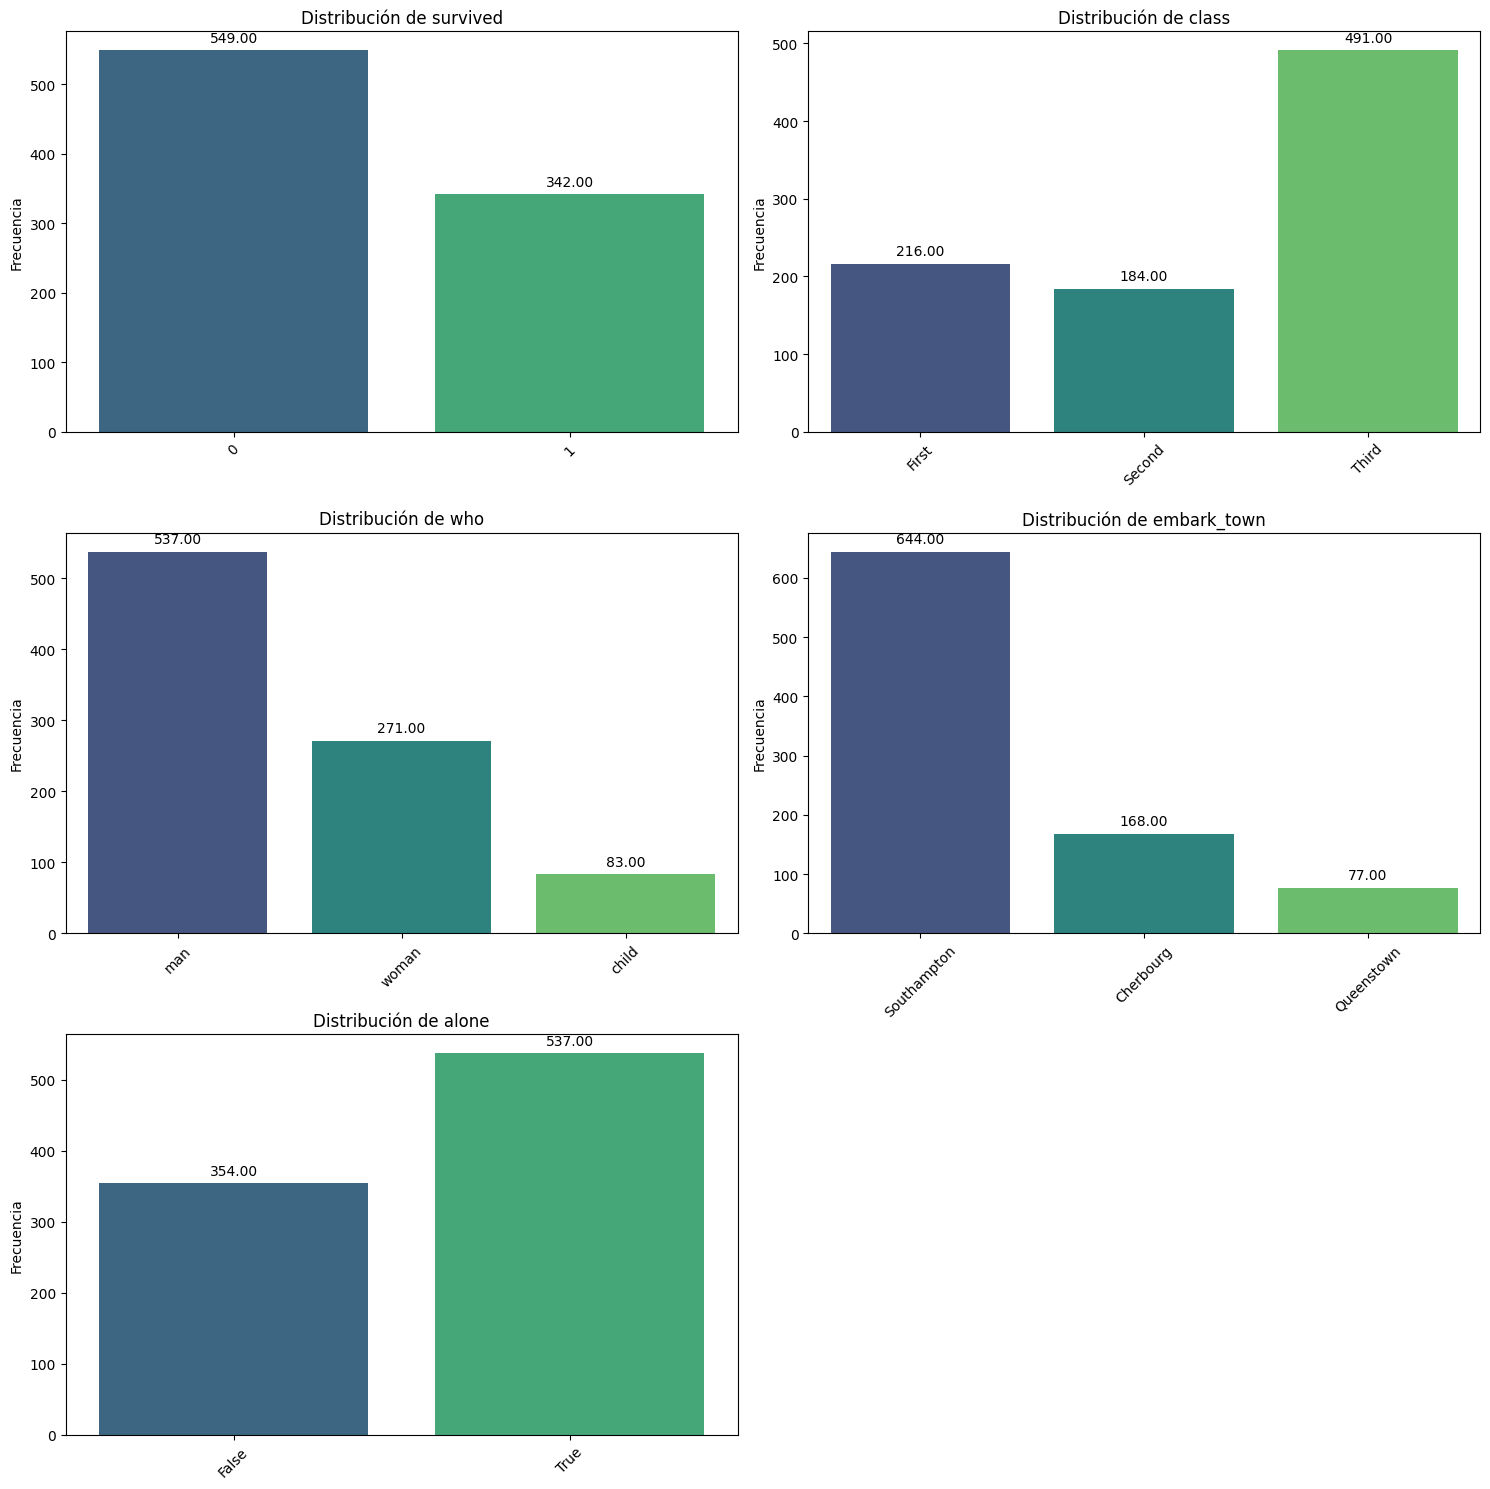

In [44]:
pinta_distribucion_categoricas(df, categoricas_admission, mostrar_valores = True)

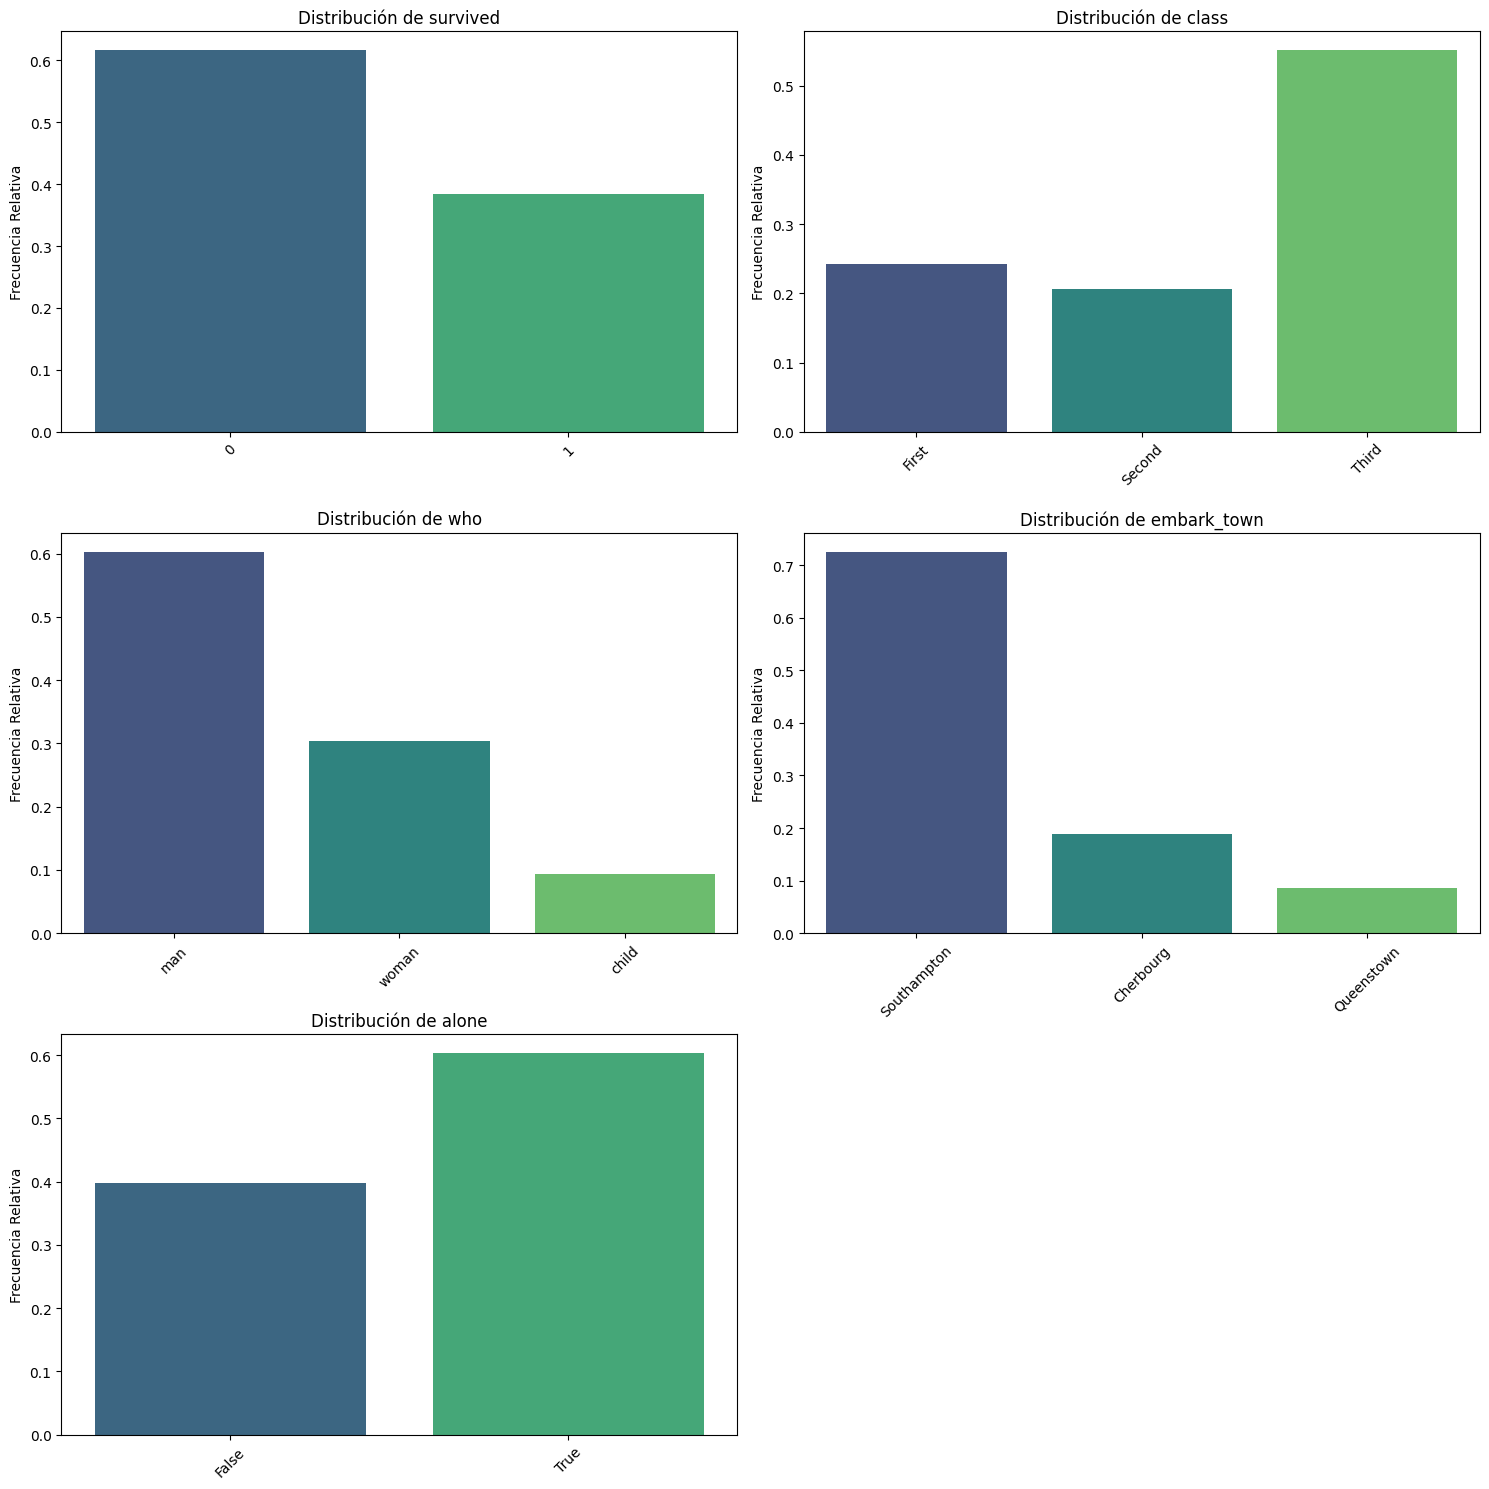

In [47]:
pinta_distribucion_categoricas(df, categoricas_admission, relativa=True)

In [58]:
df.groupby(['class'])['survived'].mean()

C:\Users\usuària\AppData\Local\Temp\ipykernel_2344\2497839827.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['class'])['survived'].mean()


class
First     0.629630
Second    0.472826
Third     0.242363
Name: survived, dtype: float64

In [ ]:
df.groupby('who')['survived'].mean()

who
child    0.590361
man      0.163873
woman    0.756458
Name: survived, dtype: float64

- Sólo 1/3 de los pasajeros sobrevivieron, aunque la gran mayoría eran de 1a y 2a clase y especialmente mujeres y niños.
- Más del 50% de los pasajeros eran de 3a clase.
- Más del 70% embarcó en Southampton. 
- Más de la mitad viajaba solo. Puede influir en la probabilidad de ser asistido durante evacuación (ver "class" y "fare")

- Aunque la mayoría de pasajeros eran hombres, su mortaldad fu del 84% (bivariante)

No sé pueden sacar muchas conclusiones si no se cruzan las variables (bivariante o multivariente)

- Ver distribución mortaldad según who y class
- Ver distribución class según ciudad
- Cruzar alone con class y fare


#Resumen LR

***survived***:
- Según estos valores el ratio de supervivencia fue casi la mitad que el de mortalidad (38% a 62%). Este dato concuerda con la sensación de que fue un accidente con un alto índice de mortalidad. Estaría bien, si el tiempo lo permite, contrastar con otros datos similares de la época.

***who***
- Esta variable muestra la distinción entre adultos (mujeres y hombres) y niños. Claramente me la apunto para hacer una bivariante con *survived* para saber como se distribuyeron esas muertes y si se mantuvo el patrón (62-38)

***class***
- Habiendo visto la película, estas frecuencias nos pareceran más que normales, claramente había mucho más pasaje de tercera (55%) que de segunda (21%) y de primera (24%). Curiosamente había más de primera que de segunda (por lo menos en este dataset) (Estos curiosamete me los guardo como mensajes de poca prioridad o para dar colorido)

***embarked***
- Por ahora sólo podemos decir que embarcaron principamente en Southampton (72%), un cierto número en Cherboroug (19%) y ya menos en Queenstown (9%).

***alone***
- Según esta variable eran más los pasajeros que viajaban sólos (60%) que los que no (40%), ¿fue un handicap viajar sólo?

***sex***
- Viajaron más hombres que mujeres (65%-35%), y lo interesante vendrá cuando crucemos esta variable con survived o con alive y con who.

### #2.2 Numéricas

(2,)


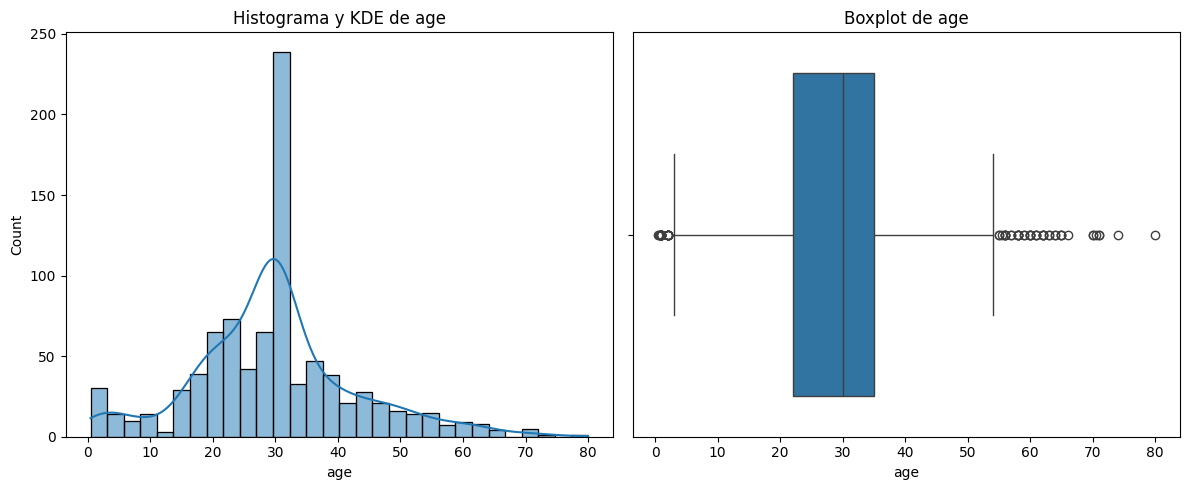

In [50]:
plot_combined_graphs(df, ["age"])

In [47]:
df.age.describe()

count    891.000000
mean      29.758889
std       13.002570
min        0.420000
25%       22.000000
50%       30.000000
75%       35.000000
max       80.000000
Name: age, dtype: float64

### IQR de Edad
IQR = 35 - 22 = 13
3 * IQR = 39
maximum = P75 + lw = 35 + 39 = 74
minimum = min(P25 - lw, min) = 22 - 39 = -17 -> 0.42

In [52]:
# Obtenemos sus CVs:
def get_CV(df, columna):
    columna = [columna] if type(columna) == str else columna
    return df[columna].describe().T["std"]/df[columna].describe().T["mean"] * 100

In [56]:
get_CV(df,"age") #<30 % se considera que media no es representativa, distribución no homogénea

age    43.693063
dtype: float64

In [55]:
get_CV(df,"fare")

fare    154.307253
dtype: float64

In [63]:
df.groupby(['sex', 'pclass'], observed=False)['age'].mean()

sex     pclass
female  1         34.611765
        2         28.722973
        3         21.750000
male    1         41.281386
        2         30.740707
        3         26.507589
Name: age, dtype: float64

- Distribución centrada en adultos (20-40)
- Extremos son pequeños, pero de gran relevancia (interesante ver supervivencia, class y who de estos grupos)
- La distribución del intervalo mayoritario se correspone a la clase (3a 20 y tantos, 2a 30s, 3a, 40s)

(2,)


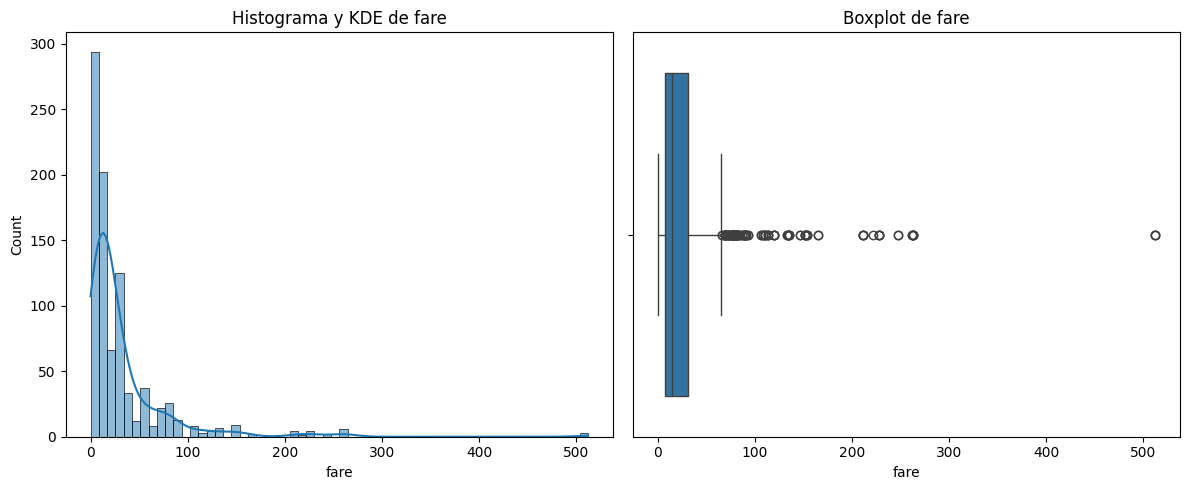

In [64]:
plot_combined_graphs(df, ["fare"])

In [66]:
df.fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64

- Distribución logarítmica normal (muy habitual en sueldos, por ejemplo)

- Distribución fuertemente sesgada a la derecha (valores centrales entornos a 32 y hay valores de hasta 512)
- Muchos outliers
- La mayoría pagó tarifas bajas, pero existe un grupo reducido con tarifas extremadamente altas.
- Fuertemente relacionada con class

***age***:
- Presenta una bonita gráfica casi-normal, que habla de simetría, buena representación por las tendencias centrales (quizá nuevamente mejor la mediana que la media, aunque están cercanas) aunque haya cierta dispersión (CV > 30%). Presenta posibles outliers por encima y por debajo (pero en este caso serán los bebés y los adultos mayores). Por apuntar valores (media: 32, mediana:30). Cómo ya sé que existe la variable "who", me apunto un análisis interesante que puede ser "age"/"who", y por supuesto "age"/"class". En general "age" se presta interesante para entender mejor el pasaje y luego relacionarlo multivariantemente con "survived".

*fare*:
* El precio del ticket presenta una curva de distribución completamente diferente, como casi era de esperar y que si lo ligamos a otras observaciones como el customer_lifetime_value, puede que sea bastente características de precios, ingresos, gastos en servicios, etc. Es una distribución con concentración (el tamaño de la caja es reducido) y larga cola (como se puede ver en la existencia de bastantes valores que podrían ser considerados outliers). La media parece poco representativa y optaríamos por la mediana como un valor más representativo (de 32 a 14 ¿libras?) pero sin duda será interesante quizá tratar esta variable como una posible para hacer *binnig* y relacionarla con class, que igual ya nos ahorra ese *binning* y la necesida